In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random
from scipy.stats import norm
from tqdm.auto import tqdm

In [2]:
data = pd.read_csv('ba2.csv')

In [3]:
# for i in data.columns:
#     if len(data[i].unique()) > 4:
#         print(f'"{i}",')

In [4]:
TARGET = 'Тяжесть'

In [5]:
data[TARGET].unique()

array([3, 2], dtype=int64)

In [6]:
name_group_all = {
    'Тяжесть' : ['БАТТ', 'БАСТ'],
    'SNP_rs896' : ['TT', 'TC', 'CC']
}

In [7]:
name_group_all

{'Тяжесть': ['БАТТ', 'БАСТ'], 'SNP_rs896': ['TT', 'TC', 'CC']}

In [8]:
name_group_all[TARGET]

['БАТТ', 'БАСТ']

In [9]:
#обозначение групп

name_group = name_group_all[TARGET]
#spisok_group
data = data.dropna(subset=[TARGET])
data = data.astype({TARGET: np.int32})
#обозначение групп

In [10]:
data[TARGET].unique()

array([3, 2])

In [11]:
#data['Тяжесть'].sum()

In [12]:
#for i in range(len(data['Тяжесть'])):
#    if data.loc[i,'Тяжесть'] == 2:
#        data.loc[i,'Тяжесть'] = 1
#    elif data.loc[i,'Тяжесть'] == 3:
#        data.loc[i,'Тяжесть'] = 0
        

In [70]:
#необходимо обозначить какие переменные к какой группе относятся
scale = [
'Приступов_удушья_в_день',
'Обострений_в_год',
'Длительность_БА_на_момент_исслед',
'САД',
'ДАД',
'ЧД',
'ЧСС',
'Пульс',
'Сатурация_при_поступлении',
'Сатурация_при_выписке',
'Лейкоциты_при_поступлении',
'Эритроциты_при_постпулении',
'Гемоглобин_при_поступлении',
'Тромбоциты_при_поступлении',
'Сегментоядерные_при_поступлении',
'Эозинофилы_при_поступлении',
'Моноциты_при_поступлении',
'Лимфоциты_при_поступлении',
'СОЭ_при_поступлении',
'Лейкоциты_при_выписке',
'Эритроциты_при_выписке',
'Гемоглобин_при_выписке',
'Тромбоциты_при_выписке',
'Сегментоядерные_при_выписке',
'Лимфоциты_при_выписке',
'СОЭ_при_выписке',
'БАК_посев_мокроты',
'IgE_общий',
'FeF25_при_поступлении',
'FeF50_при_поступлении',
'FeF75_при_поступлении',
'FeF25_при_выписке',
'FeF50_при_выписке',
'FeF75_при_выписке',
'ЧСС_ЭКГ',
'Общий_билирубин',
'Глюкоза_крови',
'Общий_белок',
'Холестерин',
'Возраст2',
'Рост',
'Вес',
'обострений_за_последний_год',
'ACQ_контроль_симптомов_БА',
'Самочувствие',
'Активность',
'Настроение',
'Экстраверсия_интроверсия',
'Ригидность_пластичность',
'Эмоционвозбудим_уравновешенность',
'Быстрота_реакц_медлительность',
'Активность_пасивность',
'Искренность',
'Реактивная_тревожность',
'Ситуатвиная_тревожность',
'Физическая_активность_PF',
'Физичпроблемы_в_жизнедеят_RP',
'Интенсивность_боли_BP',
'Общее_здоровье_GH',
'Жизненная_актвиность_VT',
'Социальная_активность_SF',
'Эмоционал_проблемы_в_жизнедеят_RE',
'Психическое_здоровье_MH',
'Физич_компонент_здор_PH',
'Психич_компонент_здор_MH',
'Наличие_вегет_дисфун',
'Наличие_вегет_дисфун2',
'Апатия1',
'Апатия2',
'Уровень_VIP',
'Уровень_SP',
'ЖЕЛ_при_поступлении',
'ОФВ1_при_поступлении',
'Индекс_Тиффно_при_поступлении',
'ЖЕЛ_при_выписке',
'ОФВ1_при_выписке',
'Индекс_Тиффно_при_выписке',
'ИМТ',
'VAR_mc',
'aVNN_mc',
'SDNN_mc',
'pNN50',
'rMSSD',
'SDNNidx_mc',
'SDANN_mc',
'VLF',
'LF_Симпатика',
'HF_Парасимпатика',
'nHF',
'CBBP',
'LF_HF',
]
categorial = [
#  "Сезон_обострения_БА",
#  "Худшее_время_суток_по_БА",
#  "Ухудшение_состояния_в_отпуске",
#  "Заболевания_ЖКТ",

# "Терапия_БА",
# "Форма",
# "Тяжесть",
# "Оценка_соц_бытовых_условий",
# "ДН",
# "Эмфизема",
# "ХЛС",
# "Пневмосклероз",
# "Гормонозависимость",
# "Проживание",
# "Профессиональное_заболевание",
# "ГБ",
# "ИБС",
# "ГЭРБ",
# "Наличие_суносовой_аритмии",
# "Наличие_гипертрофии_ЛЖ",
# "Эозинофилы_в_мокроте",
# "Пол",
# "Наличие_работы",
# "Работа_в_ночную_смену",
# "Профессиональый_контакт",
# "Образование",
# "Наличие_аллергической_реакции",
# "Аллерг_реакция_у_родственников",
# "Наличие_заболевания_ЖКТ",
# "Наличие_заболевания_ЛОРорганов",
# "Наличие_грибковых_заболеваний",
# "Ухудшение_состояния_при_физнагруз",
# "Ухудшение_состояния_во_время_еды",
# "Влияние_менструальногоцикла_на_БА",
# "Наличие_ОтёкаКвинке_в_анамнезе",
# "Наличие_стресса",
# "Наличие_других_заболеваний",
 "SNP_rs896",
#  "SNP_rs2072100",
# "SNP_rs3771829",
#  "SNP_rs3823082",
#  "Фенотип",
# "Коридор",
#  "Симпатика",
]


In [71]:
spisok_group = categorial

In [77]:
def test_fishera(data, i , name_group_all):
    data = data.dropna(subset=[i])
    data = data.astype({i: np.int32})
    n_ind = len(data[i].unique())+1
    data_vr = np.zeros((n_ind, 12))
    col_ch = 0
    for col in data[TARGET].unique():
        vsego = 0
        ind_ch = 0
        for ind in sorted(data[i].unique()):
            data_vr[ind_ch, col_ch] = data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
            vsego += data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
            ind_ch += 1
        data_vr[len(data[i].unique()),col_ch] = vsego
        col_ch += 1
    data_vr[n_ind-1,2] = data_vr[n_ind-1,1]
    data_fisher = np.zeros((2,2))   
    for j in range(n_ind-1):
        data_fisher[0,0] = data_vr[j,0]
        data_fisher[0,1] = data_vr[j,1]
        data_fisher[1,0] = data_vr[n_ind-1,0] - data_vr[j,0]
        data_fisher[1,1] = data_vr[n_ind-1,1] - data_vr[j,1]
        
        data_vr[j,2] = data_fisher[0,1]
        #проценты
        data_vr[j,1] = round(data_fisher[0,0] / data_vr[n_ind-1,0] * 100, 2)
        data_vr[j,3] = round(data_fisher[0,1] / data_vr[n_ind-1,2] * 100, 2)
        #хи квадрат
        hi2 = st.chi2_contingency(data_fisher)
        data_vr[j,4] = round(hi2[0], 2)
        data_vr[j,5] = round(hi2[1], 3)
        #Фишер
        _, pfisher = st.fisher_exact(data_fisher)
        data_vr[j,6] = round(pfisher, 2)
        
        #Фишера-Бошло
        
        fisher_boschloo = st.boschloo_exact(data_fisher)
        
        data_vr[j,7] = round(fisher_boschloo.statistic, 2)
        data_vr[j,8] = round(fisher_boschloo.pvalue, 7)
        
        data_vr[j,9] = round((data_vr[j,0] / (data_vr[n_ind-1,0] - data_vr[j,0])) /
                             (data_vr[j,1] / (data_vr[n_ind-1,1] - data_vr[j,1])),2)

        data_vr[j,10] = round(math.exp(math.log(data_vr[j,6]+0.00001) 
                                      - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
        data_vr[j,11] = round(math.exp(math.log(data_vr[j,6]+0.00001)
                                               +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)


    data_vr[n_ind-1,1] = 100
    data_vr[n_ind-1,3] = 100
    cl = []

    for j in range(n_ind):
        cl.append(f'{data_vr[j,10]} - {data_vr[j,11]}')

    try: name_g = name_group_all[TARGET]    
    except: name_g = data[TARGET].unique()

    df = {f'{name_g[0]} (абс.)': [int(data_vr[j,0]) for j in range(n_ind)], 
          f'{name_g[0]} (%)': [data_vr[j,1] for j in range(n_ind)],
          f'{name_g[1]} (абс.)' : [int(data_vr[j,2]) for j in range(n_ind)], 
          f'{name_g[1]} (%)': [data_vr[j,3] for j in range(n_ind)],
          'χ2': [data_vr[j,4] for j in range(n_ind)],
          'p (χ2)': [data_vr[j,5] for j in range(n_ind)],
          'p (fishe)': [data_vr[j,6] for j in range(n_ind)],
          'FB': [data_vr[j,7] for j in range(n_ind)],
          'p (boschloo)': [data_vr[j,8] for j in range(n_ind)],
          'OR': [data_vr[j,9] for j in range(n_ind)],
          'CI - 95%': [cl[j] for j in range(n_ind)],

         } 

    df = pd.DataFrame(df)

    df.loc[n_ind-1, 'χ2' : 'CI - 95%'] = ''
   
    try:
        name = []
        name2 = name_group_all[i]
        for j in range(len(name2)):
            name.append(name2[j])
        name.append('Всего:')
        df.index = name
    except: 
        name = sorted(data[i].unique())
        name.append('Всего:')
        df.index = name
        
    plot_bar(data, data_vr, i , name_group_all)
    display(df) 
    return(data_vr)

SNP_rs896


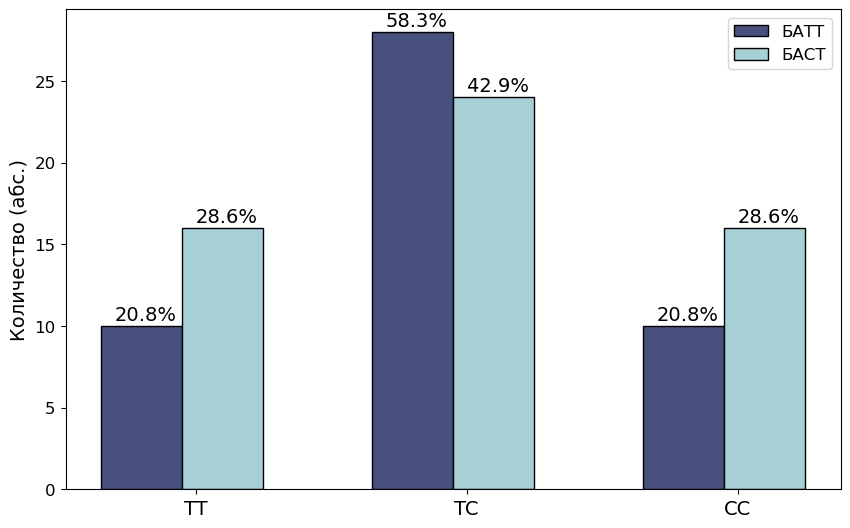

,БАТТ (абс.),БАТТ (%),БАСТ (абс.),БАСТ (%),χ2,p (χ2),p (fishe),FB,p (boschloo),OR,CI - 95%
TT,10,20.83,16,28.57,0.46,0.496,0.5,0.25,0.39298,0.44,0.2 - 1.24
TC,28,58.33,24,42.86,1.9,0.169,0.17,0.08,0.124725,-0.06,0.08 - 0.37
CC,10,20.83,16,28.57,0.46,0.496,0.5,0.25,0.39298,0.44,0.2 - 1.24
Всего:,48,100.00,56,100.00,,,,,,,


In [78]:
for i in categorial:
    print(i)
    data_vr = test_fishera(data, i, name_group_all)
    print('===============================================================================')

In [79]:
def plot_bar(data, data_vr, i , name_group_all):
    plt.figure(figsize=(10,6))
    # ширина полос
    barWidth = 0.3

    # высота 1 ряда
    bars1 = [data_vr[j,0] for j in range(len(data_vr[:,0])-1)]
    # высота 2 ряда
    bars2 = [data_vr[j,2] for j in range(len(data_vr[:,0])-1)]
    bars3 = bars1 + bars2
    # ошибки 1
    yer1 = [0.5, 0.4, 0.5]
    # ошибки 2
    yer2 = [1, 0.7, 1]
    # The x position of bars
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    try:
        name = name_group_all[TARGET]
    except: 
        name = data[TARGET].unique()

    # Create blue bars
    ax = plt.bar(r1, bars1, width = barWidth, color = '#48507E', edgecolor = 'black', label=name[0])

    # Create cyan bars
    ax = plt.bar(r2, bars2, width = barWidth, color = '#A6CFD6', edgecolor = 'black', label=name[1])

    # general layout
    
    try:
        name = name_group_all[i]
    except: 
        name = sorted(data[i].unique())
        
        
    # Create labels
    # высота 1 ряда
    pr1 = [data_vr[j,1] for j in range(len(data_vr[:,0])-1)]
    pr2 = [data_vr[j,3] for j in range(len(data_vr[:,0])-1)]
    pr3 = pr1 + pr2
    label = [f'{pr3[j]:.1f}%' for j in range(len(pr3))]

    if len(pr3) == 4:
        r3 = [-0.1,0.9,0.2,1.2]
    elif len(pr3) == 6:
        r3 = [-0.1,0.9,1.9,0.2,1.2, 2.2]
    elif len(pr3) == 8:
        r3 = [-0.1,0.9,1.9,2.9, 0.2,1.2, 2.2,3.2]
    elif len(pr3) == 10:
        r3 = [-0.1,0.9,1.9,2.9, 3.9, 0.2,1.2, 2.2,3.2, 4.2]
    elif len(pr3) == 12:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9, 0.2,1.2, 2.2,3.2, 4.2,5.2]
    elif len(pr3) == 14:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9,5.9, 0.2,1.2, 2.2,3.2, 4.2,5.2,6.2]
    elif len(pr3) == 16:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9,5.9,6.9, 0.2,1.2, 2.2,3.2, 4.2,5.2,6.2,7.2]
    # Text on the top of each bar
    for i in range(len(r3)):
        plt.text(x = r3[i] , y = bars3[i]+0.35, s = label[i], size = 14)

    plt.xticks([r + barWidth - 0.6/len(pr3) for r in range(len(bars1))], name, size = 14)
    plt.yticks(size = 12)
    plt.ylabel('Количество (абс.)', size = 14)
    plt.legend(fontsize = 12)
    plt.subplots_adjust(bottom= 0.2, top = 1)
    # Show graphic
    plt.show()